# <center><b><font color ='orange'> Autism Prediction </b> </font>

# <b><font color ='purple'> About our problem </b> </font> 
 
 <h3><b><font color ='green'> Abstract </b> </font></h3>
<li>Improve Autism Screening by creating predicting the likelihood of having this condition.
</li><br>
<h3><b><font color ='green'> About this dataset </b> </font></h3>
<li>
What is Autism
Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication.
</li>

 <h3><b><font color ='green'> Causes and Challenges </b> </font></h3>
 <li>It is mostly influenced by a combination of genetic and environmental factors. Because autism is a spectrum disorder, each person with autism has a distinct set of strengths and challenges. The ways in which people with autism learn, think and problem-solve can range from highly skilled to severely challenged.
Research has made clear that high quality early intervention can improve learning, communication and social skills, as well as underlying brain development. Yet the diagnostic process can take several years.
</li>
<h3><b><font color ='green'> The Role of Machine Learning </b> </font></h3>
 <li>This dataset is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.
</li>



### <b><font color ='purple'> Import Libraries</b> </font> 

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split ,cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score

### <b><font color ='purple'> Read Train and Test Dataset </b> </font>

In [31]:
train = pd.read_csv(r"C:\Users\MARWA\Desktop\sem 5\2-G_A\train.csv")
test = pd.read_csv(r"C:\Users\MARWA\Desktop\sem 5\2-G_A\test.csv")

In [113]:
print ("The shape of the training set  is:", train.shape)
print ("The shape of the testing set  is:", test.shape)

The shape of the training set  is: (800, 22)
The shape of the testing set  is: (200, 9)


### <b><font color ='purple'> Data Preprocessing (Data Cleaning) </b> </font>

In [33]:
train.head().T

,0,1,2,3,4
ID,1,2,3,4,5
A1_Score,1,0,1,0,0
A2_Score,0,0,1,0,0
A3_Score,1,0,1,0,0
A4_Score,1,0,1,1,0
A5_Score,1,0,1,0,1
A6_Score,1,0,1,0,0
A7_Score,0,0,0,0,0
A8_Score,1,0,0,0,0
A9_Score,1,0,1,0,1


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

##### <b><font color ='blue'> According to the output above there is no null values:)</b> </font>

In [35]:
train["A10_Score"].describe()

count    800.000000
mean       0.460000
std        0.498709
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A10_Score, dtype: float64

In [36]:
train["A10_Score"].value_counts()

0    432
1    368
Name: A10_Score, dtype: int64

In [37]:
train.rename(columns = {'Class/ASD':'ASD'}, inplace = True)
test.rename(columns = {'Class/ASD':'ASD'}, inplace = True)


#### Several features can easily be converted to binary numeric using Label Encoder

In [38]:
features = ['gender','jaundice','austim','used_app_before']
for feature in features:
    train[feature]= LabelEncoder().fit_transform(train[feature])
    test[feature]= LabelEncoder().fit_transform(test[feature])

### <b><font color ='purple'> Looking for Correlations
 </b> </font>


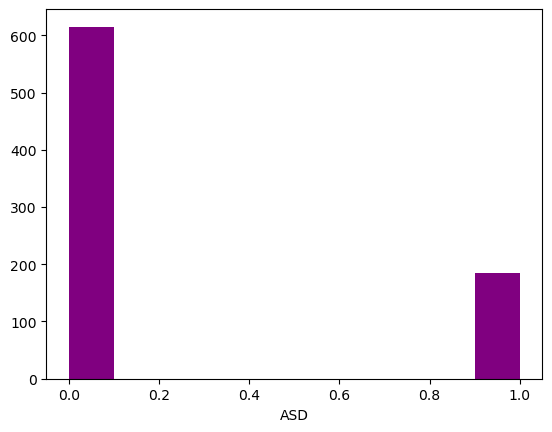

In [61]:
plt.hist(train.ASD, color = 'purple')
plt.xlabel("ASD")
plt.show()

Above, there are 4 features, with coefficients greater than 0.5, that are strongly correlated with the ASD.


#### Country of residence is problematic so let's drop and see whether a good model can be produced without it

In [63]:
print("Number of countries in training set:",len(train.contry_of_res.unique()))
print("Number of countries in Testing set:",len(test.contry_of_res.unique()))
df_train = train.drop(columns = ['contry_of_res'])
df_test = test.drop(columns = ['contry_of_res'])

Number of countries in training set: 61
Number of countries in Testing set: 44


#### More than half of the 'White-Europeans' in this sample are diagnosed with autism. Why?

In [64]:
print(df_train.groupby('ethnicity')['ASD'].value_counts())

ethnicity        ASD
?                0      136
                 1       15
Asian            0      117
                 1       17
Black            0       37
                 1        8
Hispanic         0       11
                 1        5
Latino           0       29
                 1       15
Middle Eastern   0      108
                 1        8
Others           0       19
                 1        5
Pasifika         0       17
                 1        1
South Asian      0       34
                 1        1
Turkish          0        3
                 1        1
White-European   1      108
                 0      103
others           0        1
                 1        1
Name: ASD, dtype: int64


#### The following code creates a separate feature to reflect this

In [42]:
df_temp = pd.get_dummies(df_train.ethnicity)
df_train['White-European'] = df_temp['White-European']
df_train = df_train.drop(columns = ['ethnicity'])

In [43]:
df_temp = pd.get_dummies(df_test.ethnicity)
df_test['White-European'] = df_temp['White-European']
df_test = df_test.drop(columns = ['ethnicity'])

#### Let's look at the 'relation' feature. Not obvious there is a close link to the target but let's retain it for now.

In [44]:
print(df_train.groupby('relation')['ASD'].value_counts(normalize = True))

relation                  ASD
?                         0      0.974026
                          1      0.025974
Health care professional  0      1.000000
Others                    0      0.857143
                          1      0.142857
Parent                    0      0.653061
                          1      0.346939
Relative                  0      0.860465
                          1      0.139535
Self                      0      0.742301
                          1      0.257699
Name: ASD, dtype: float64


In [45]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

#### Let's visualise the features

In [67]:
num = train.select_dtypes(include = ['float64', 'int64'])
num_corr =num.corr()['ASD'][:-1] # -1 means that the latest row is SalePrice
top_features = num_corr[abs(num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with ASD:\n{}".format(len(top_features), top_features))

There is 4 strongly correlated values with ASD:
A3_Score    0.549618
A6_Score    0.542588
A9_Score    0.538688
A4_Score    0.512792
Name: ASD, dtype: float64


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'A1_Score'}>,
        <AxesSubplot:title={'center':'A2_Score'}>,
        <AxesSubplot:title={'center':'A3_Score'}>],
       [<AxesSubplot:title={'center':'A4_Score'}>,
        <AxesSubplot:title={'center':'A5_Score'}>,
        <AxesSubplot:title={'center':'A6_Score'}>,
        <AxesSubplot:title={'center':'A7_Score'}>],
       [<AxesSubplot:title={'center':'A8_Score'}>,
        <AxesSubplot:title={'center':'A9_Score'}>,
        <AxesSubplot:title={'center':'A10_Score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'jaundice'}>,
        <AxesSubplot:title={'center':'austim'}>,
        <AxesSubplot:title={'center':'used_app_before'}>],
       [<AxesSubplot:title={'center':'result'}>,
        <AxesSubplot:title={'center':'ASD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

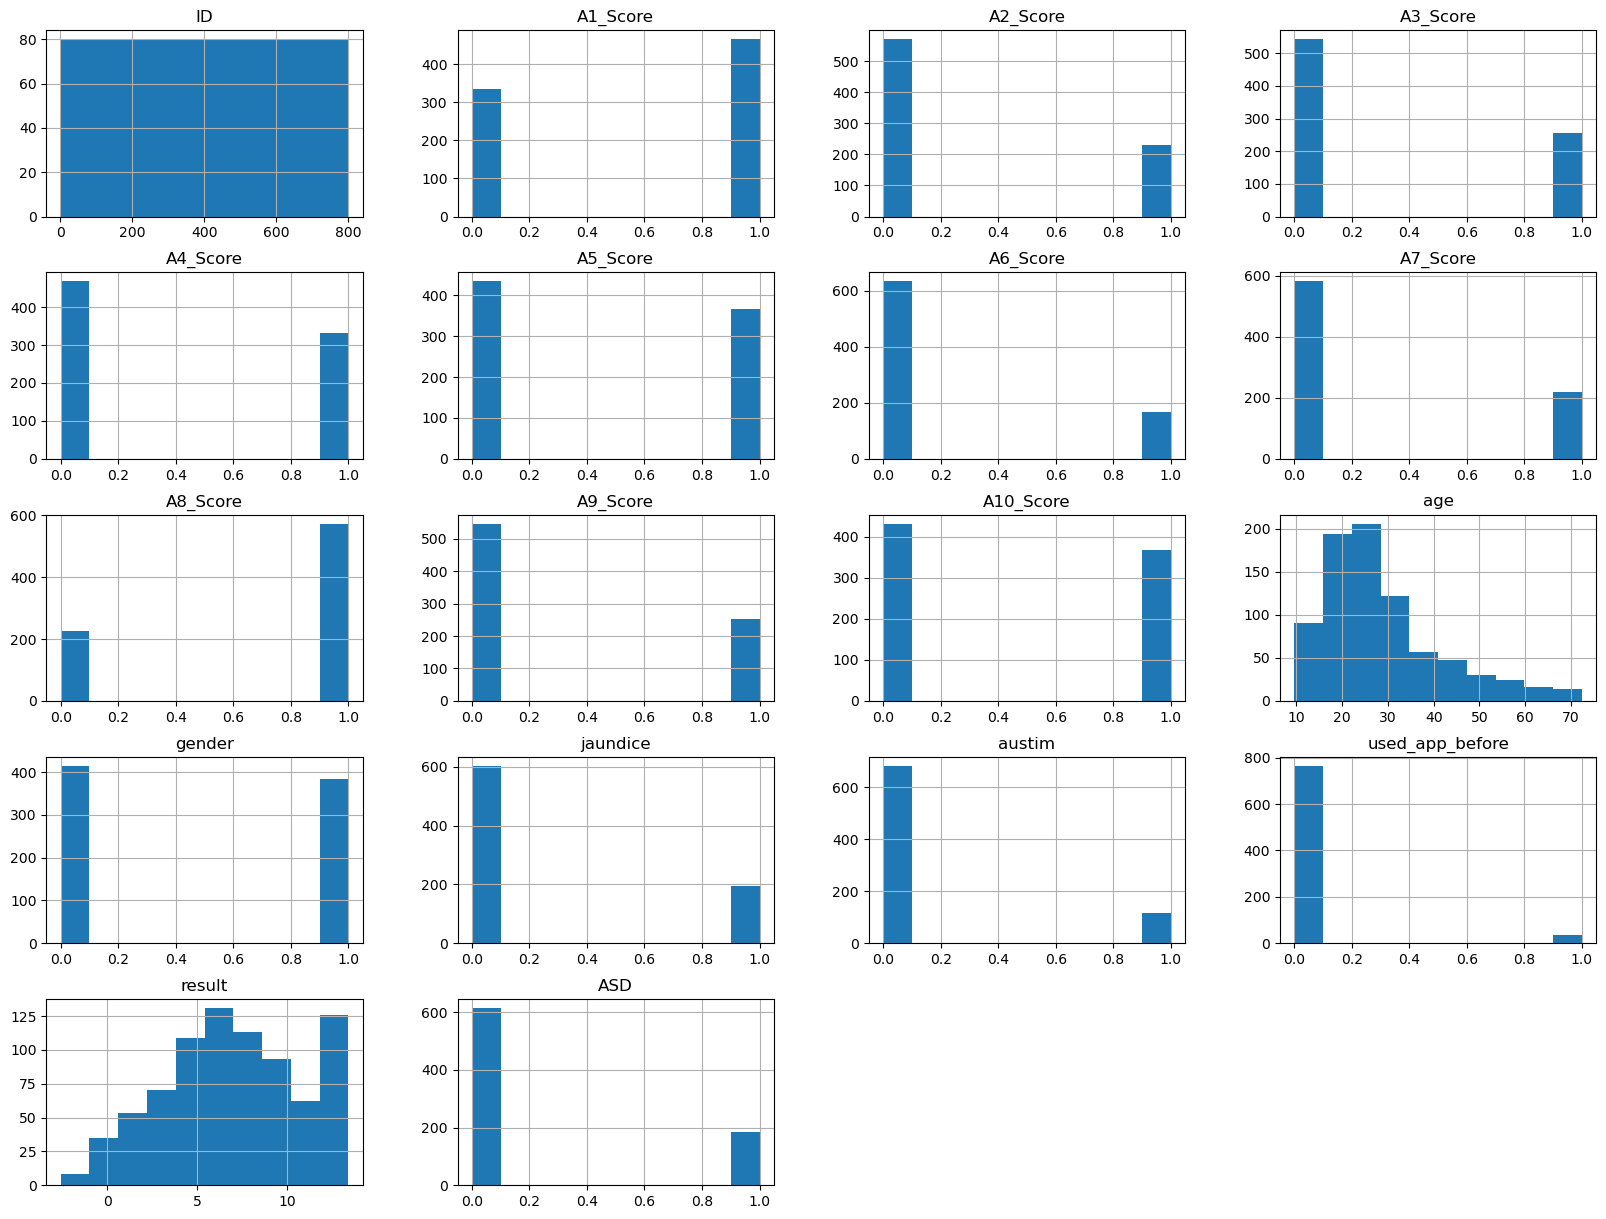

In [112]:
train.hist(figsize=(20,15))

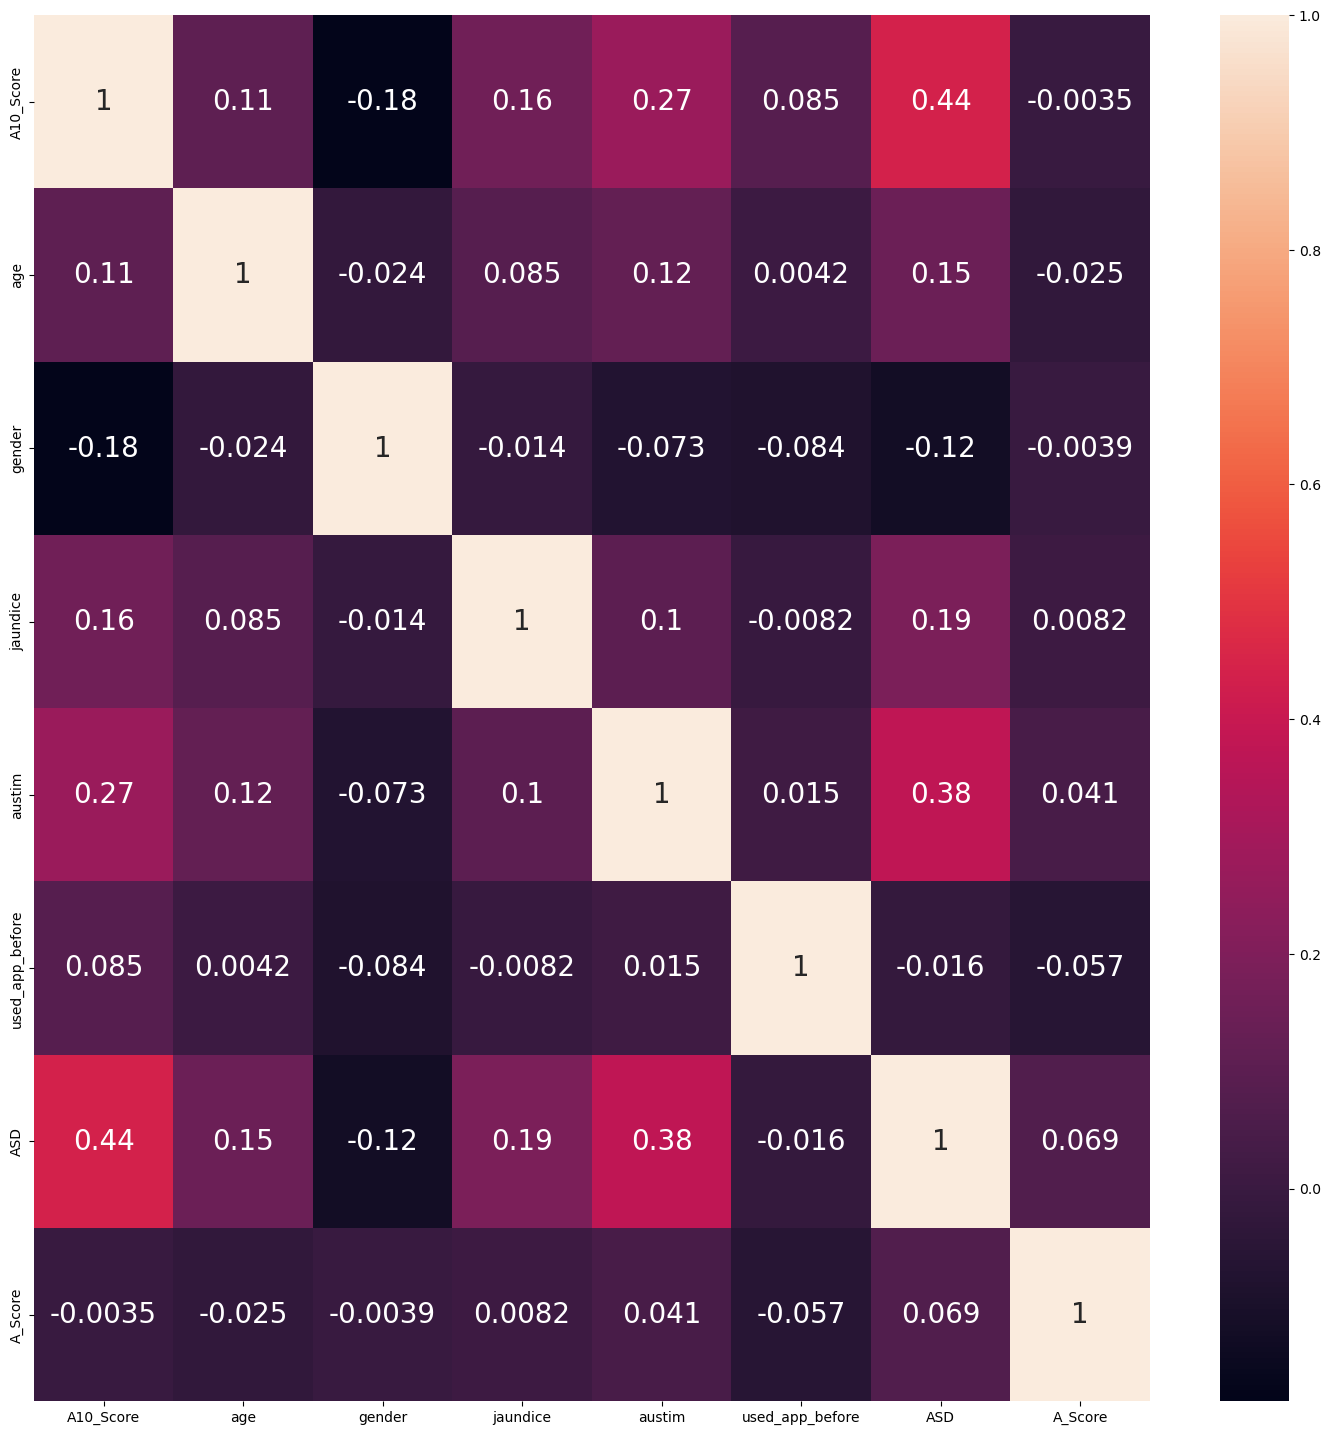

In [98]:
plt.figure(1 , figsize = (18 , 18))
cor = sns.heatmap(df_train.corr(), annot = True, annot_kws={"size": 20})

In [75]:
df_train = df_train.drop(columns = ['result'])
df_test = df_test.drop(columns = ['result'])

#### Let's use the best performing features for the model

In [83]:
features = ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score"]

#### Let's use cross validation to see how well these features perform

In [84]:
y = train['ASD']
X = train[features]
test = test[features]

In [85]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [86]:
print(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))
print(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

[0.8375 0.8125 0.8125 0.9125 0.9125 0.875  0.8875 0.9125 0.9125 0.8375]
0.8712500000000001


#### A sample score and confusion matrix

In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y)
clf.fit(X_train, y_train)
clf.score(X_valid,y_valid)

0.865

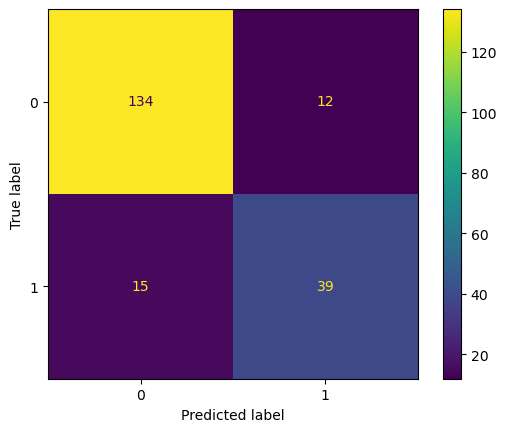

In [100]:
predictions = clf.predict(X_valid)
cm = confusion_matrix(y_valid, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

#### Refit the model using all the data

In [101]:
clf.fit(X,y)

LogisticRegression()